In [251]:
from loader_findata import Finloader
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable 
import matplotlib.pyplot as plt

In [4]:
f=Finloader("C:/Users/Max/clear_data")

In [128]:
f.close()
for i in tqdm(range(len(f)-30000)):
    f.step()
df=[]
dt=[]
for i in tqdm(range(30000)):
    d,k=f.step()
    dt.append(d)
    df.append(k)

100%|██████████| 30000/30000 [00:22<00:00, 1360.63it/s]


In [129]:
df2=pd.DataFrame(columns=f.get_columns(), data=df,index=dt)

In [142]:
Y=df2[list(filter(lambda x: x[:5]=='close', list(df2.columns)))].shift(-1)/df2[list(filter(lambda x: x[:5]=='close', list(df2.columns)))]

In [178]:
trainX,testX,trainY,testY=train_test_split(df2,Y,shuffle=False)
trainY=trainY.iloc[:-1]
trainX=trainX.iloc[:-1]
testY=testY.iloc[:-1]
testX=testX.iloc[:-1]
trainX=torch.tensor(np.array(trainX),dtype=torch.float32)
trainY=torch.tensor(np.array(trainY),dtype=torch.float32)
testX=torch.tensor(np.array(testX),dtype=torch.float32)
testY=torch.tensor(np.array(testY),dtype=torch.float32)

In [113]:
testX

,baseVolume_1000SHIBUSDT,baseVolume_1000XECUSDT,baseVolume_1INCHUSDT,baseVolume_AAVEUSDT,baseVolume_ADAUSDT,baseVolume_ALGOUSDT,baseVolume_ALICEUSDT,baseVolume_ALPHAUSDT,baseVolume_ANKRUSDT,baseVolume_ARPAUSDT,...,takerBuyQuoteVolume_XEMUSDT,takerBuyQuoteVolume_XLMUSDT,takerBuyQuoteVolume_XMRUSDT,takerBuyQuoteVolume_XRPUSDT,takerBuyQuoteVolume_XTZUSDT,takerBuyQuoteVolume_YFIUSDT,takerBuyQuoteVolume_ZECUSDT,takerBuyQuoteVolume_ZENUSDT,takerBuyQuoteVolume_ZILUSDT,takerBuyQuoteVolume_ZRXUSDT
2022-03-20 03:00:00+00:00,50379819.0,261741.0,141858.0,1834.6,1257169.0,339815.5,60386.3,126621.0,2625201.0,574600.0,...,17385.8457,4.986108e+04,47475.84122,7.035316e+05,75342.3381,40939.564,164978.22351,49763.9924,7.546497e+04,16700.68445
2022-03-20 03:05:00+00:00,71974478.0,420695.0,37653.0,3458.7,511802.0,173521.3,46734.5,228185.0,1041898.0,519083.0,...,6792.7365,4.312586e+04,63323.51467,5.754932e+05,87729.3372,30104.548,131704.43448,42378.4773,7.783531e+04,11711.47268
2022-03-20 03:10:00+00:00,39006913.0,415966.0,55711.0,2061.0,465425.0,225129.4,73073.0,422711.0,1553727.0,473485.0,...,4251.1181,1.585499e+04,20315.69945,2.927386e+05,125964.0834,68497.749,368165.75891,48661.9974,2.925419e+04,3250.50220
2022-03-20 03:15:00+00:00,62518688.0,296017.0,36208.0,798.5,550527.0,164100.0,73288.8,58307.0,2263049.0,475015.0,...,7416.4809,3.909895e+04,106844.97193,4.105306e+05,49585.3246,78785.038,306891.92732,16852.5211,3.759415e+04,6685.86669
2022-03-20 03:20:00+00:00,91708152.0,236202.0,37715.0,1941.2,767844.0,286033.8,56611.4,66572.0,2675091.0,513242.0,...,1966.2414,2.671195e+04,20091.73230,5.169662e+05,90317.5346,33210.719,396571.13846,34642.7274,4.444474e+04,29563.09720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-15 03:30:00+00:00,49640447.0,381679.0,44618.0,4809.6,876322.0,909736.7,49707.8,425849.0,864301.0,417283.0,...,37877.6807,7.028984e+05,45017.43039,8.817642e+06,81546.3312,25536.770,92204.19709,16003.8267,1.414889e+06,26897.34253
2022-04-15 03:35:00+00:00,33373663.0,208935.0,34350.0,1443.8,949040.0,236364.4,70411.1,254714.0,770273.0,365649.0,...,6077.7539,1.465797e+06,31504.15575,6.397235e+06,44131.5741,34000.199,149250.55454,14334.9780,9.888551e+05,86831.48313
2022-04-15 03:40:00+00:00,27005848.0,315033.0,15819.0,738.7,572775.0,107367.6,23730.4,476397.0,583577.0,196566.0,...,2485.5440,1.357536e+06,22036.34875,4.764400e+06,73718.5625,11095.148,48006.99255,9464.6307,1.133279e+06,42184.65741
2022-04-15 03:45:00+00:00,29147836.0,217713.0,78278.0,1860.0,517428.0,169039.7,28442.5,208851.0,609537.0,245520.0,...,43751.0982,3.732460e+06,67245.47159,6.645475e+06,75263.9426,13941.137,165370.30717,8454.2535,6.048572e+05,69314.44193


In [114]:
testY

,close_1000SHIBUSDT,close_1000XECUSDT,close_1INCHUSDT,close_AAVEUSDT,close_ADAUSDT,close_ALGOUSDT,close_ALICEUSDT,close_ALPHAUSDT,close_ANKRUSDT,close_ARPAUSDT,...,close_XEMUSDT,close_XLMUSDT,close_XMRUSDT,close_XRPUSDT,close_XTZUSDT,close_YFIUSDT,close_ZECUSDT,close_ZENUSDT,close_ZILUSDT,close_ZRXUSDT
2022-03-20 03:00:00+00:00,1.002570,1.000736,1.002249,1.003030,1.001012,0.999349,1.004706,1.003414,1.000662,1.001400,...,1.000000,1.001451,1.002873,1.000123,0.999100,0.998741,0.998927,1.003624,1.001566,1.001106
2022-03-20 03:05:00+00:00,0.996975,0.998652,0.997320,0.996208,0.998091,0.997135,0.996374,0.997278,0.994974,0.996924,...,0.998006,0.996603,0.998492,0.998773,0.998499,0.993504,0.994514,0.997472,0.996425,0.997423
2022-03-20 03:10:00+00:00,1.003835,1.001104,1.001187,1.001419,1.002926,1.002090,1.001668,1.002388,1.002526,1.002244,...,1.000999,1.002256,1.001812,1.001229,0.998798,1.001903,0.999943,0.999976,1.000000,1.002030
2022-03-20 03:15:00+00:00,1.000210,1.000368,0.999938,1.000838,1.001010,0.999479,1.003785,1.000340,1.001724,1.000140,...,1.001996,1.000950,1.000653,1.000123,0.999699,1.002630,0.998009,1.002365,1.000000,0.998527
2022-03-20 03:20:00+00:00,0.999202,0.998285,1.001061,0.998648,1.001457,1.001826,0.998492,0.998639,1.000662,0.999020,...,0.998008,1.001199,0.999347,1.000614,1.001505,1.001214,1.002165,1.002673,1.000673,1.001660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-15 03:30:00+00:00,0.998575,0.998389,0.999673,0.997378,0.998418,0.999590,0.996934,1.001037,0.996361,0.999415,...,0.999002,1.010003,1.000174,1.003225,0.999069,0.999366,0.999316,0.998932,0.999379,0.995370
2022-04-15 03:35:00+00:00,1.000964,1.000861,1.000654,1.000972,1.000211,1.000410,1.000461,1.002850,0.999870,1.001025,...,1.000999,1.002136,0.999696,1.002315,1.000311,1.000053,1.000000,1.000261,1.003371,1.001329
2022-04-15 03:40:00+00:00,1.000039,1.000752,1.001111,0.999829,1.000317,1.000683,1.002459,1.000258,1.000000,1.000585,...,1.000000,1.008914,1.000434,1.001796,0.998447,1.000476,1.001712,0.999974,0.997878,1.000133
2022-04-15 03:45:00+00:00,1.002581,1.000107,1.003068,1.002113,1.003062,1.002458,1.000767,1.001550,1.001957,1.001169,...,1.002994,1.009555,1.003514,1.008452,1.003110,1.001373,1.001709,1.002319,1.001861,0.998408


In [179]:
X_train_tensors_final = torch.reshape(trainX,   (trainX.shape[0], 1, trainX.shape[1]))
Y_train_tensors_final = trainY
X_test_tensors_final = torch.reshape(testX,   (testX.shape[0], 1, testX.shape[1]))
Y_test_tensors_final =  testY

In [180]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [292]:
num_epochs =200 #1000 epochs
learning_rate = 0.002 #0.001 lr

input_size = 1080 #number of features
hidden_size = 10 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 120 #number of output classes 

In [293]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 

In [294]:
criterion = torch.nn.L1Loss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

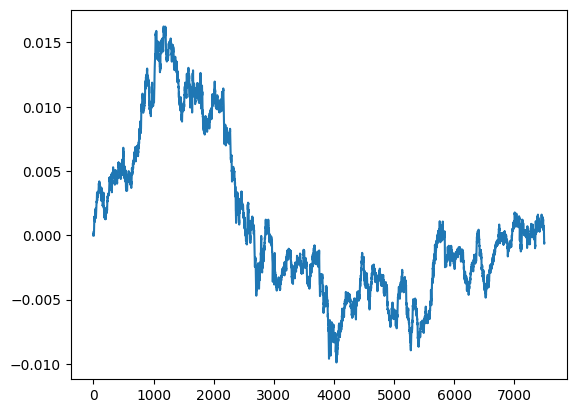

Epoch: 0, loss: 0.99290


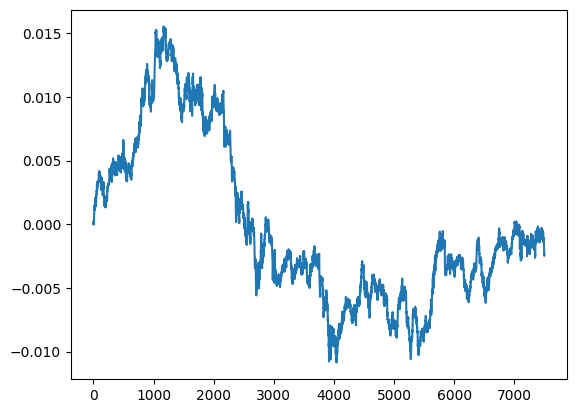

Epoch: 10, loss: 0.70969


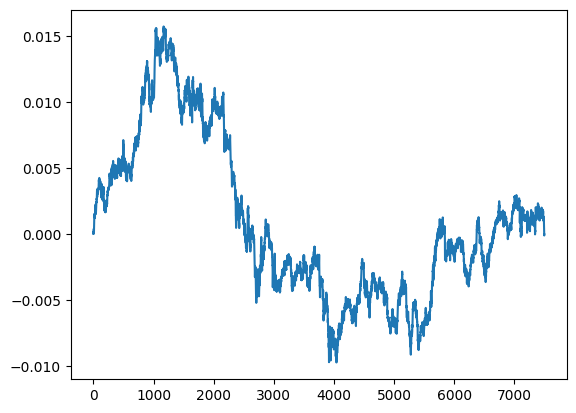

Epoch: 20, loss: 0.34335


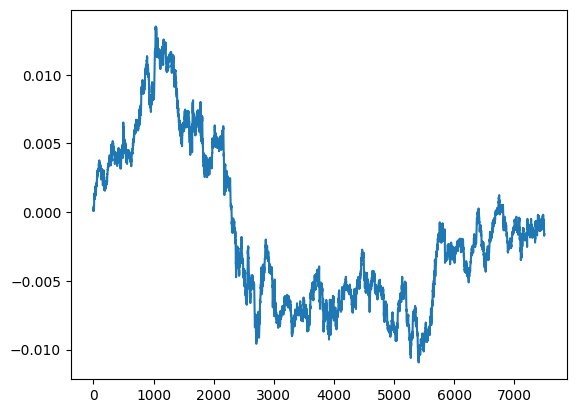

Epoch: 30, loss: 0.13422


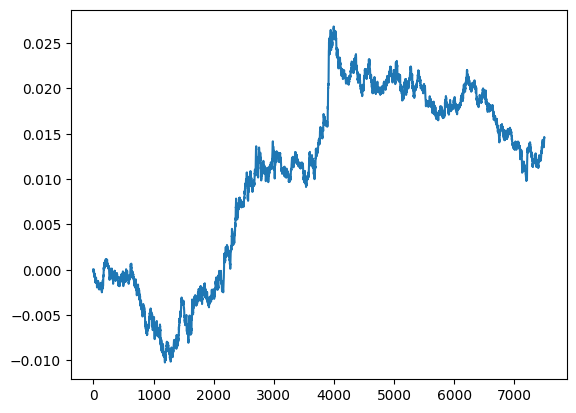

Epoch: 40, loss: 0.07117


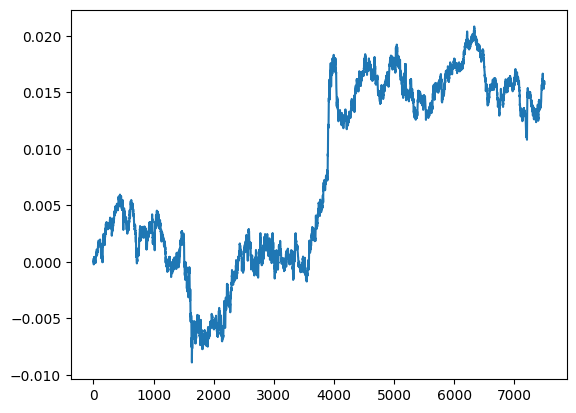

Epoch: 50, loss: 0.04540


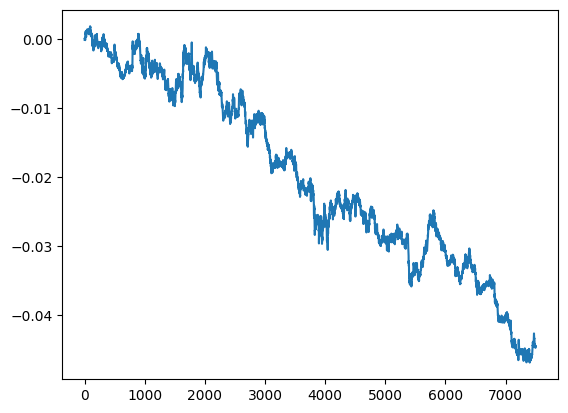

Epoch: 60, loss: 0.01957


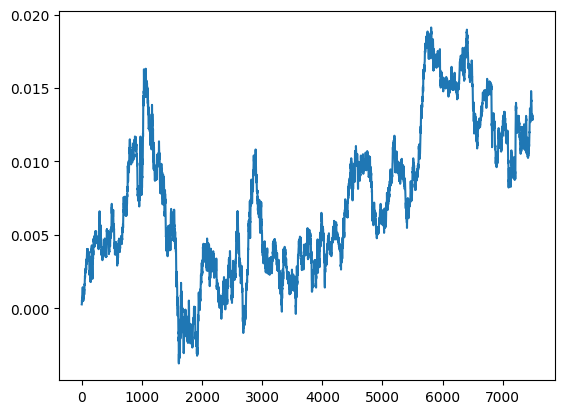

Epoch: 70, loss: 0.01360


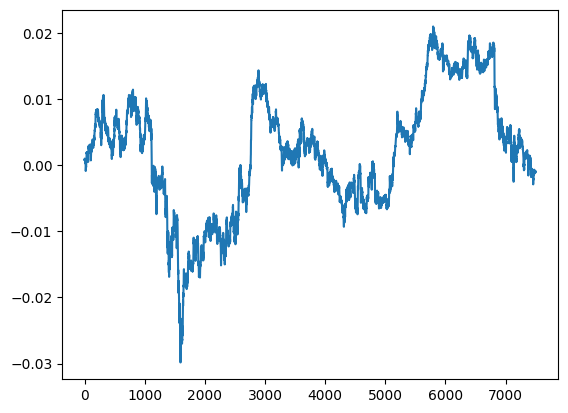

Epoch: 80, loss: 0.00921


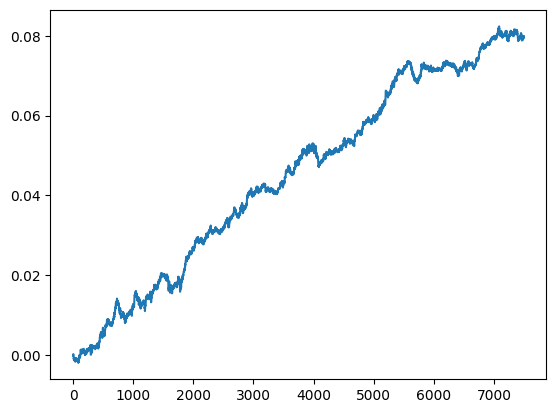

Epoch: 90, loss: 0.00582


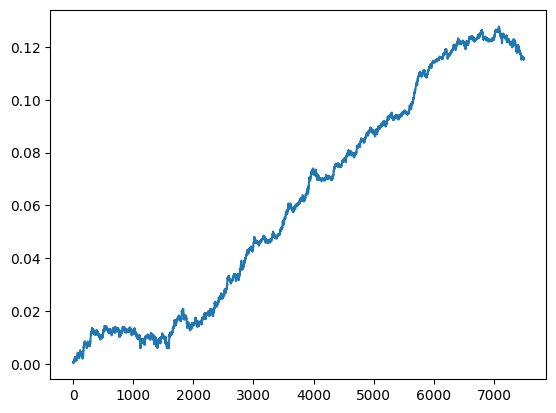

Epoch: 100, loss: 0.00467


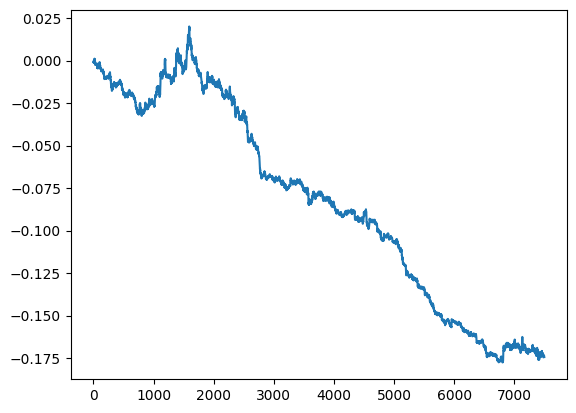

Epoch: 110, loss: 0.00386


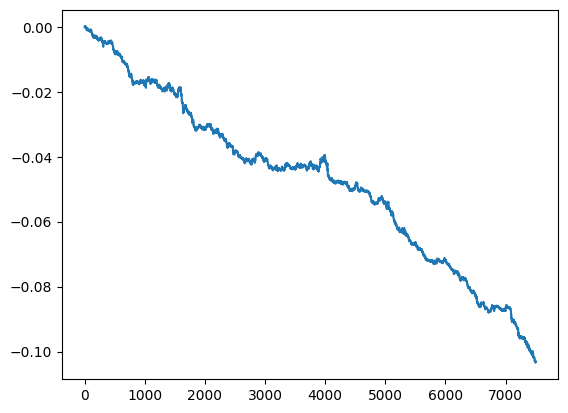

Epoch: 120, loss: 0.00331


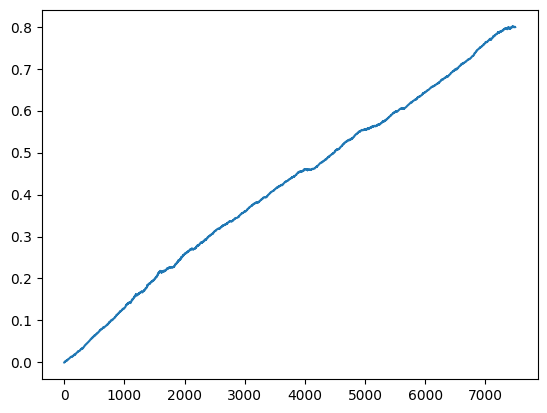

Epoch: 130, loss: 0.00308


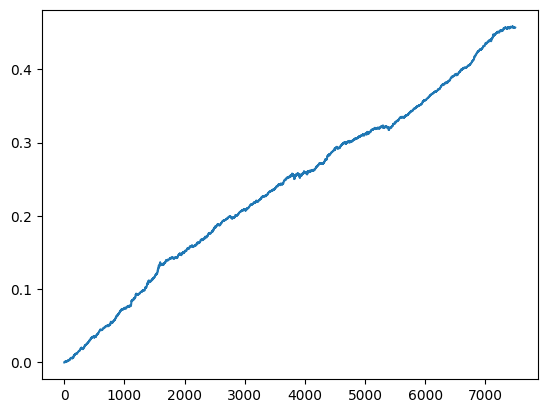

Epoch: 140, loss: 0.00287


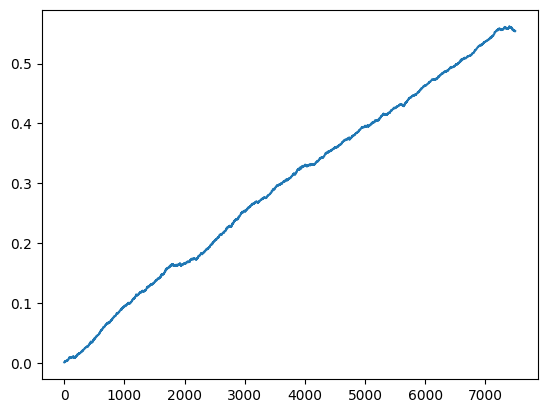

Epoch: 150, loss: 0.00272


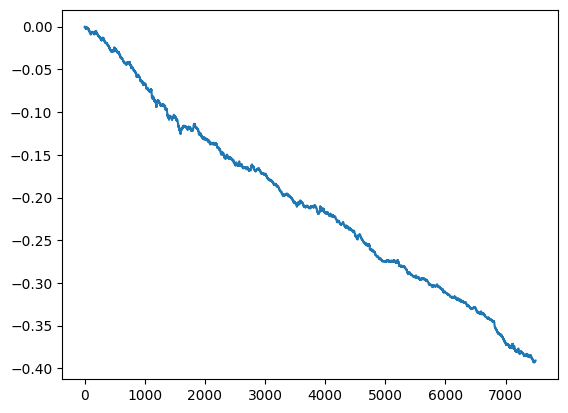

Epoch: 160, loss: 0.00271


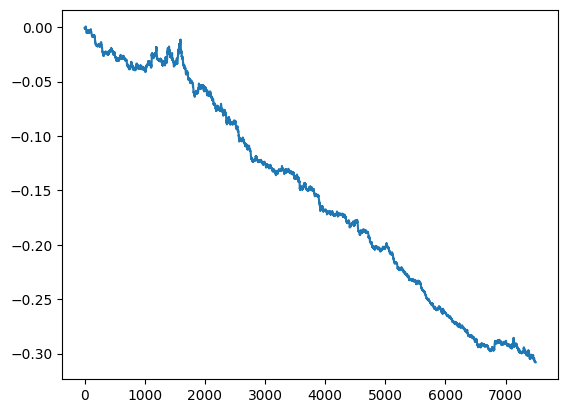

Epoch: 170, loss: 0.00282


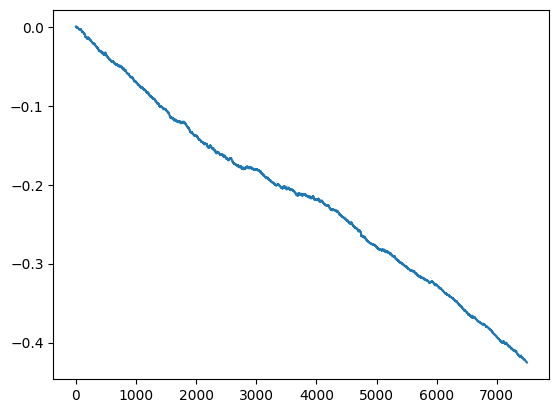

Epoch: 180, loss: 0.00268


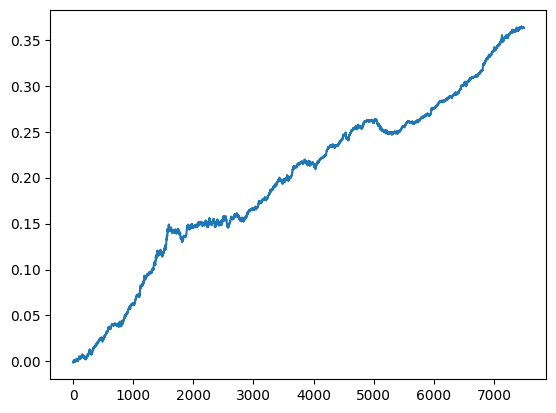

Epoch: 190, loss: 0.00268


In [295]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, Y_train_tensors_final)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 10 == 0:
    lstm1.eval()
    plt.plot((scale(neutralize(pd.DataFrame(lstm1(X_test_tensors_final).detach().numpy())))*pd.DataFrame(Y_test_tensors_final.detach().numpy())).sum(axis=1).cumsum())
    plt.show()
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
    lstm1.train()

In [141]:
df2[list(filter(lambda x: x[:5]=='close', list(df2.columns)))]

,close_1000SHIBUSDT,close_1000XECUSDT,close_1INCHUSDT,close_AAVEUSDT,close_ADAUSDT,close_ALGOUSDT,close_ALICEUSDT,close_ALPHAUSDT,close_ANKRUSDT,close_ARPAUSDT,...,close_XEMUSDT,close_XLMUSDT,close_XMRUSDT,close_XRPUSDT,close_XTZUSDT,close_YFIUSDT,close_ZECUSDT,close_ZENUSDT,close_ZILUSDT,close_ZRXUSDT
2024-09-27 20:00:00+00:00,0.020229,0.03812,0.3094,167.83,0.4005,0.1442,1.177,0.06760,0.03100,0.04876,...,0.0198,0.09880,162.94,0.5857,0.749,5377.0,30.24,8.707,0.01659,0.3679
2024-09-27 20:05:00+00:00,0.020098,0.03802,0.3088,167.38,0.4001,0.1439,1.172,0.06744,0.03093,0.04867,...,0.0198,0.09866,162.87,0.5845,0.749,5372.0,30.15,8.702,0.01656,0.3667
2024-09-27 20:10:00+00:00,0.020222,0.03806,0.3092,167.72,0.4007,0.1442,1.177,0.06756,0.03092,0.04863,...,0.0198,0.09887,162.66,0.5848,0.750,5364.0,30.17,8.710,0.01660,0.3672
2024-09-27 20:15:00+00:00,0.020214,0.03797,0.3093,167.82,0.4010,0.1440,1.176,0.06751,0.03091,0.04856,...,0.0198,0.09894,162.76,0.5851,0.749,5361.0,30.19,8.706,0.01658,0.3666
2024-09-27 20:20:00+00:00,0.020283,0.03792,0.3091,167.91,0.4011,0.1441,1.175,0.06749,0.03088,0.04858,...,0.0198,0.09910,162.79,0.5855,0.749,5361.0,30.20,8.725,0.01659,0.3665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-09 23:35:00+00:00,0.021028,0.03594,0.3839,280.69,0.9040,0.3417,1.094,0.07277,0.03529,0.04537,...,0.0338,0.39140,190.20,2.2737,1.259,7853.0,46.87,23.604,0.02114,0.4984
2025-01-09 23:40:00+00:00,0.021024,0.03593,0.3839,280.29,0.9042,0.3413,1.095,0.07287,0.03534,0.04537,...,0.0338,0.39062,190.29,2.2709,1.266,7857.0,46.89,23.612,0.02116,0.4999
2025-01-09 23:45:00+00:00,0.021004,0.03599,0.3850,280.69,0.9042,0.3422,1.097,0.07294,0.03541,0.04545,...,0.0338,0.39140,190.51,2.2737,1.272,7854.0,46.87,23.629,0.02127,0.5025
2025-01-09 23:50:00+00:00,0.021017,0.03601,0.3863,280.62,0.9046,0.3418,1.099,0.07316,0.03554,0.04555,...,0.0338,0.39098,190.80,2.2735,1.272,7867.0,46.90,23.680,0.02136,0.5038


In [140]:
df2.to_csv("last_30_rows.csv")

In [147]:
def neutralize(alpha):
  return alpha.subtract(
    alpha.mean(axis=1),
    axis=0
  )

def scale(alpha):
  return alpha.div(
    alpha
    .abs()
    .sum(axis=1),
    axis=0
  )

<Axes: >

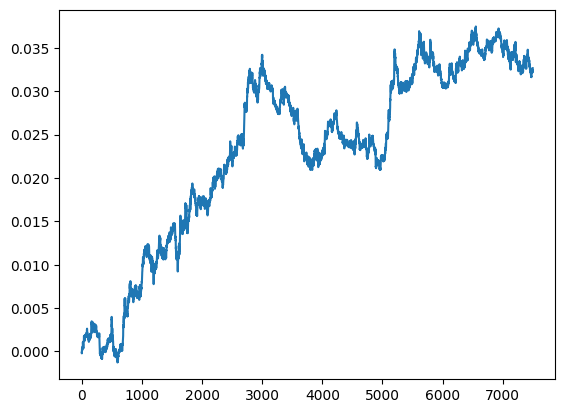

In [288]:
pd.DataFrame(X_test_tensors_final.reshape(7499,1080))

,0,1,2,3,4,5,6,7,8,9,...,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079
0,24165040.0,484265.0,243777.0,3525.000000,1998178.0,1.526689e+06,38826.699219,376838.0,679354.0,394575.0,...,0.0,3.616397e+05,19506.158203,2865699.750,31118.912109,115291.125000,19370.292969,9277.153320,21183.052734,41610.718750
1,46350768.0,558211.0,103855.0,2043.099976,1201952.0,1.790800e+06,39706.601562,196204.0,299027.0,127555.0,...,0.0,2.483018e+05,7813.066895,2805062.250,41707.968750,38317.593750,22766.708984,23523.763672,74198.789062,24590.423828
2,125964168.0,950332.0,240169.0,2942.500000,2089811.0,1.318456e+06,60818.601562,444622.0,1277439.0,431117.0,...,0.0,1.390868e+06,67537.468750,5173458.500,38473.097656,119827.093750,124784.570312,22322.984375,69805.484375,52965.425781
3,76067432.0,696757.0,215115.0,2341.899902,2442171.0,1.121037e+06,31004.300781,681332.0,423815.0,386666.0,...,0.0,1.679712e+06,73090.781250,2615121.250,75709.406250,45859.445312,29714.761719,11417.347656,18161.355469,30433.730469
4,25848464.0,269051.0,143460.0,1541.900024,1810649.0,2.964851e+06,17936.099609,122552.0,154146.0,380573.0,...,0.0,8.280490e+05,38225.648438,2651413.000,38033.406250,28543.826172,44850.003906,19886.224609,24038.031250,27998.957031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494,21842922.0,484352.0,93230.0,1983.800049,1009006.0,4.365876e+05,22109.800781,218926.0,756860.0,295742.0,...,0.0,3.926642e+05,1999.883789,2103638.250,56169.687500,22342.490234,20398.984375,59276.164062,13418.401367,72684.117188
7495,16313313.0,274281.0,101536.0,942.200012,769247.0,8.902292e+05,22749.099609,132103.0,837015.0,90456.0,...,0.0,1.745867e+05,10922.804688,964148.500,76885.695312,30641.117188,9283.379883,72345.984375,28258.517578,76874.585938
7496,21004634.0,203236.0,81328.0,775.500000,511836.0,2.671054e+05,7240.600098,225467.0,1323886.0,125089.0,...,0.0,4.163663e+05,25856.099609,1615391.625,69756.773438,13515.638672,27353.046875,54976.484375,29900.138672,42039.089844
7497,19964302.0,530940.0,137166.0,1009.900024,626002.0,2.692337e+05,6456.600098,138372.0,3090722.0,108307.0,...,0.0,3.189297e+05,7202.064941,1430041.750,100232.593750,16928.320312,9574.912109,59001.269531,49406.128906,65302.953125


In [290]:
pd.DataFrame(Y_test_tensors_final)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.002600,1.004868,1.004616,1.006284,1.002654,1.001193,1.002647,1.003530,1.004273,1.002970,...,1.0,1.004104,1.001400,1.001127,1.004286,1.004594,1.003445,1.004973,1.004874,1.003117
1,1.004091,1.000231,1.000627,1.002036,1.001796,1.001906,1.000660,1.001759,1.002015,1.001974,...,1.0,1.004729,1.001495,0.999958,1.001423,1.001773,1.003605,1.002373,1.002985,1.001799
2,1.000073,1.000692,1.001670,0.999675,1.001132,0.998573,1.000660,0.998891,1.000670,1.000493,...,1.0,1.004399,1.000770,1.001542,1.000710,1.000932,1.000342,1.000338,1.000744,1.001143
3,0.998618,0.999078,0.998541,0.996422,0.998775,1.004525,0.999341,0.998797,0.998660,0.999015,...,1.0,0.999199,1.001684,0.999292,0.997871,0.999442,1.001710,0.998715,0.997770,0.996739
4,1.002113,1.002076,1.000209,0.998232,1.001416,0.999763,1.001319,1.002130,1.001342,1.001478,...,1.0,1.002640,1.001681,1.001083,1.000711,1.000093,1.001195,1.000338,1.001118,1.000982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494,0.998244,1.000000,1.001304,1.001034,0.998674,0.998247,1.000000,0.999176,1.004269,1.000000,...,1.0,0.997655,0.996960,0.998375,1.000000,0.998220,0.999147,0.999238,1.001421,1.004434
7495,0.999810,0.999722,1.000000,0.998575,1.000221,0.998829,1.000914,1.001374,1.001417,1.000000,...,1.0,0.998007,1.000473,0.998769,1.005560,1.000509,1.000427,1.000339,1.000946,1.003010
7496,0.999049,1.001670,1.002865,1.001427,1.000000,1.002637,1.001827,1.000961,1.001981,1.001763,...,1.0,1.001997,1.001156,1.001233,1.004739,0.999618,0.999573,1.000720,1.005198,1.005201
7497,1.000619,1.000556,1.003377,0.999751,1.000442,0.998831,1.001823,1.003016,1.003671,1.002200,...,1.0,0.998927,1.001522,0.999912,1.000000,1.001655,1.000640,1.002158,1.004231,1.002587


In [291]:
pd.DataFrame(lstm1(X_test_tensors_final).detach().numpy())

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.003722,1.003174,1.004816,1.001722,1.001397,1.004357,1.003636,0.999740,1.002984,0.998411,...,1.001735,0.994537,0.997503,1.002396,0.999203,0.995597,0.996891,1.002946,0.999835,0.999265
1,0.999574,1.001221,0.999954,1.000735,0.999826,0.999835,0.998925,0.998557,1.001156,1.000825,...,1.000508,0.999555,1.000096,0.999690,0.999964,1.000797,0.999820,1.000342,1.000293,0.999469
2,0.986647,0.960129,0.974112,0.972502,1.004163,0.989286,1.010103,1.037243,0.961506,0.995107,...,0.984095,1.028153,1.008734,0.997940,1.010509,1.019098,1.023119,0.985764,0.994966,1.020701
3,0.999574,1.001221,0.999954,1.000735,0.999826,0.999835,0.998925,0.998557,1.001156,1.000825,...,1.000508,0.999555,1.000096,0.999690,0.999964,1.000797,0.999820,1.000342,1.000293,0.999469
4,0.999574,1.001221,0.999954,1.000735,0.999826,0.999835,0.998925,0.998557,1.001156,1.000825,...,1.000508,0.999555,1.000096,0.999690,0.999964,1.000797,0.999820,1.000342,1.000293,0.999469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494,1.003722,1.003174,1.004816,1.001722,1.001397,1.004357,1.003636,0.999740,1.002984,0.998411,...,1.001735,0.994537,0.997503,1.002396,0.999203,0.995597,0.996891,1.002946,0.999835,0.999265
7495,0.996101,1.000227,0.996356,0.997770,1.001863,1.001415,0.999282,0.998437,0.999452,0.999633,...,1.000115,0.999005,0.999089,1.000914,0.999275,1.003287,0.999762,1.000379,1.001055,1.002032
7496,1.003722,1.003174,1.004816,1.001722,1.001397,1.004357,1.003636,0.999740,1.002984,0.998411,...,1.001735,0.994537,0.997503,1.002396,0.999203,0.995597,0.996891,1.002946,0.999835,0.999265
7497,0.996101,1.000227,0.996356,0.997770,1.001863,1.001415,0.999282,0.998437,0.999452,0.999633,...,1.000115,0.999005,0.999089,1.000914,0.999275,1.003287,0.999762,1.000379,1.001055,1.002032
